Perform basic data cleaning, and transformation steps using 
pandas, numpy and other libraries. give me the code

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv("winequalityN.csv")

# 1. Handle missing values (fill with median or mode as appropriate)
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns, fill missing values with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2. Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])  # white = 1, red = 0

# 3. Feature scaling using StandardScaler
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include='number').drop(columns=['quality']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 4. Optional: Create a new feature - e.g., acidity ratio
df['acidity_ratio'] = df['fixed acidity'] / (df['volatile acidity'] + 1e-5)

# Final cleaned and transformed data
print(df.head())


       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  0.571367      -0.166898         -0.423168     0.284273        3.207005   
1  0.571367      -0.707155         -0.240846     0.146551       -0.807946   
2  0.571367       0.682078         -0.362394     0.559716        0.306151   
3  0.571367      -0.012539         -0.666264     0.008829        0.642482   
4  0.571367      -0.012539         -0.666264     0.008829        0.642482   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0  -0.315139             0.815565              0.959976  2.102214 -1.359590   
1  -0.200946            -0.931107              0.287618 -0.232332  0.508116   
2  -0.172397            -0.029599             -0.331660  0.134525  0.259089   
3   0.055989             0.928254              1.243074  0.301278 -0.176709   
4   0.055989             0.928254              1.243074  0.301278 -0.176709   

   sulphates   alcohol  quality  acidity_ratio  
0  -0.545868 

Step2


C:\Users\rakes\AppData\Local\Temp\ipykernel_2180\188394178.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')
C:\Users\rakes\AppData\Local\Temp\ipykernel_2180\188394178.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='coolwarm')
C:\Users\rakes\AppData\Local\Temp\ipykernel_2180\188394178.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='Set2')


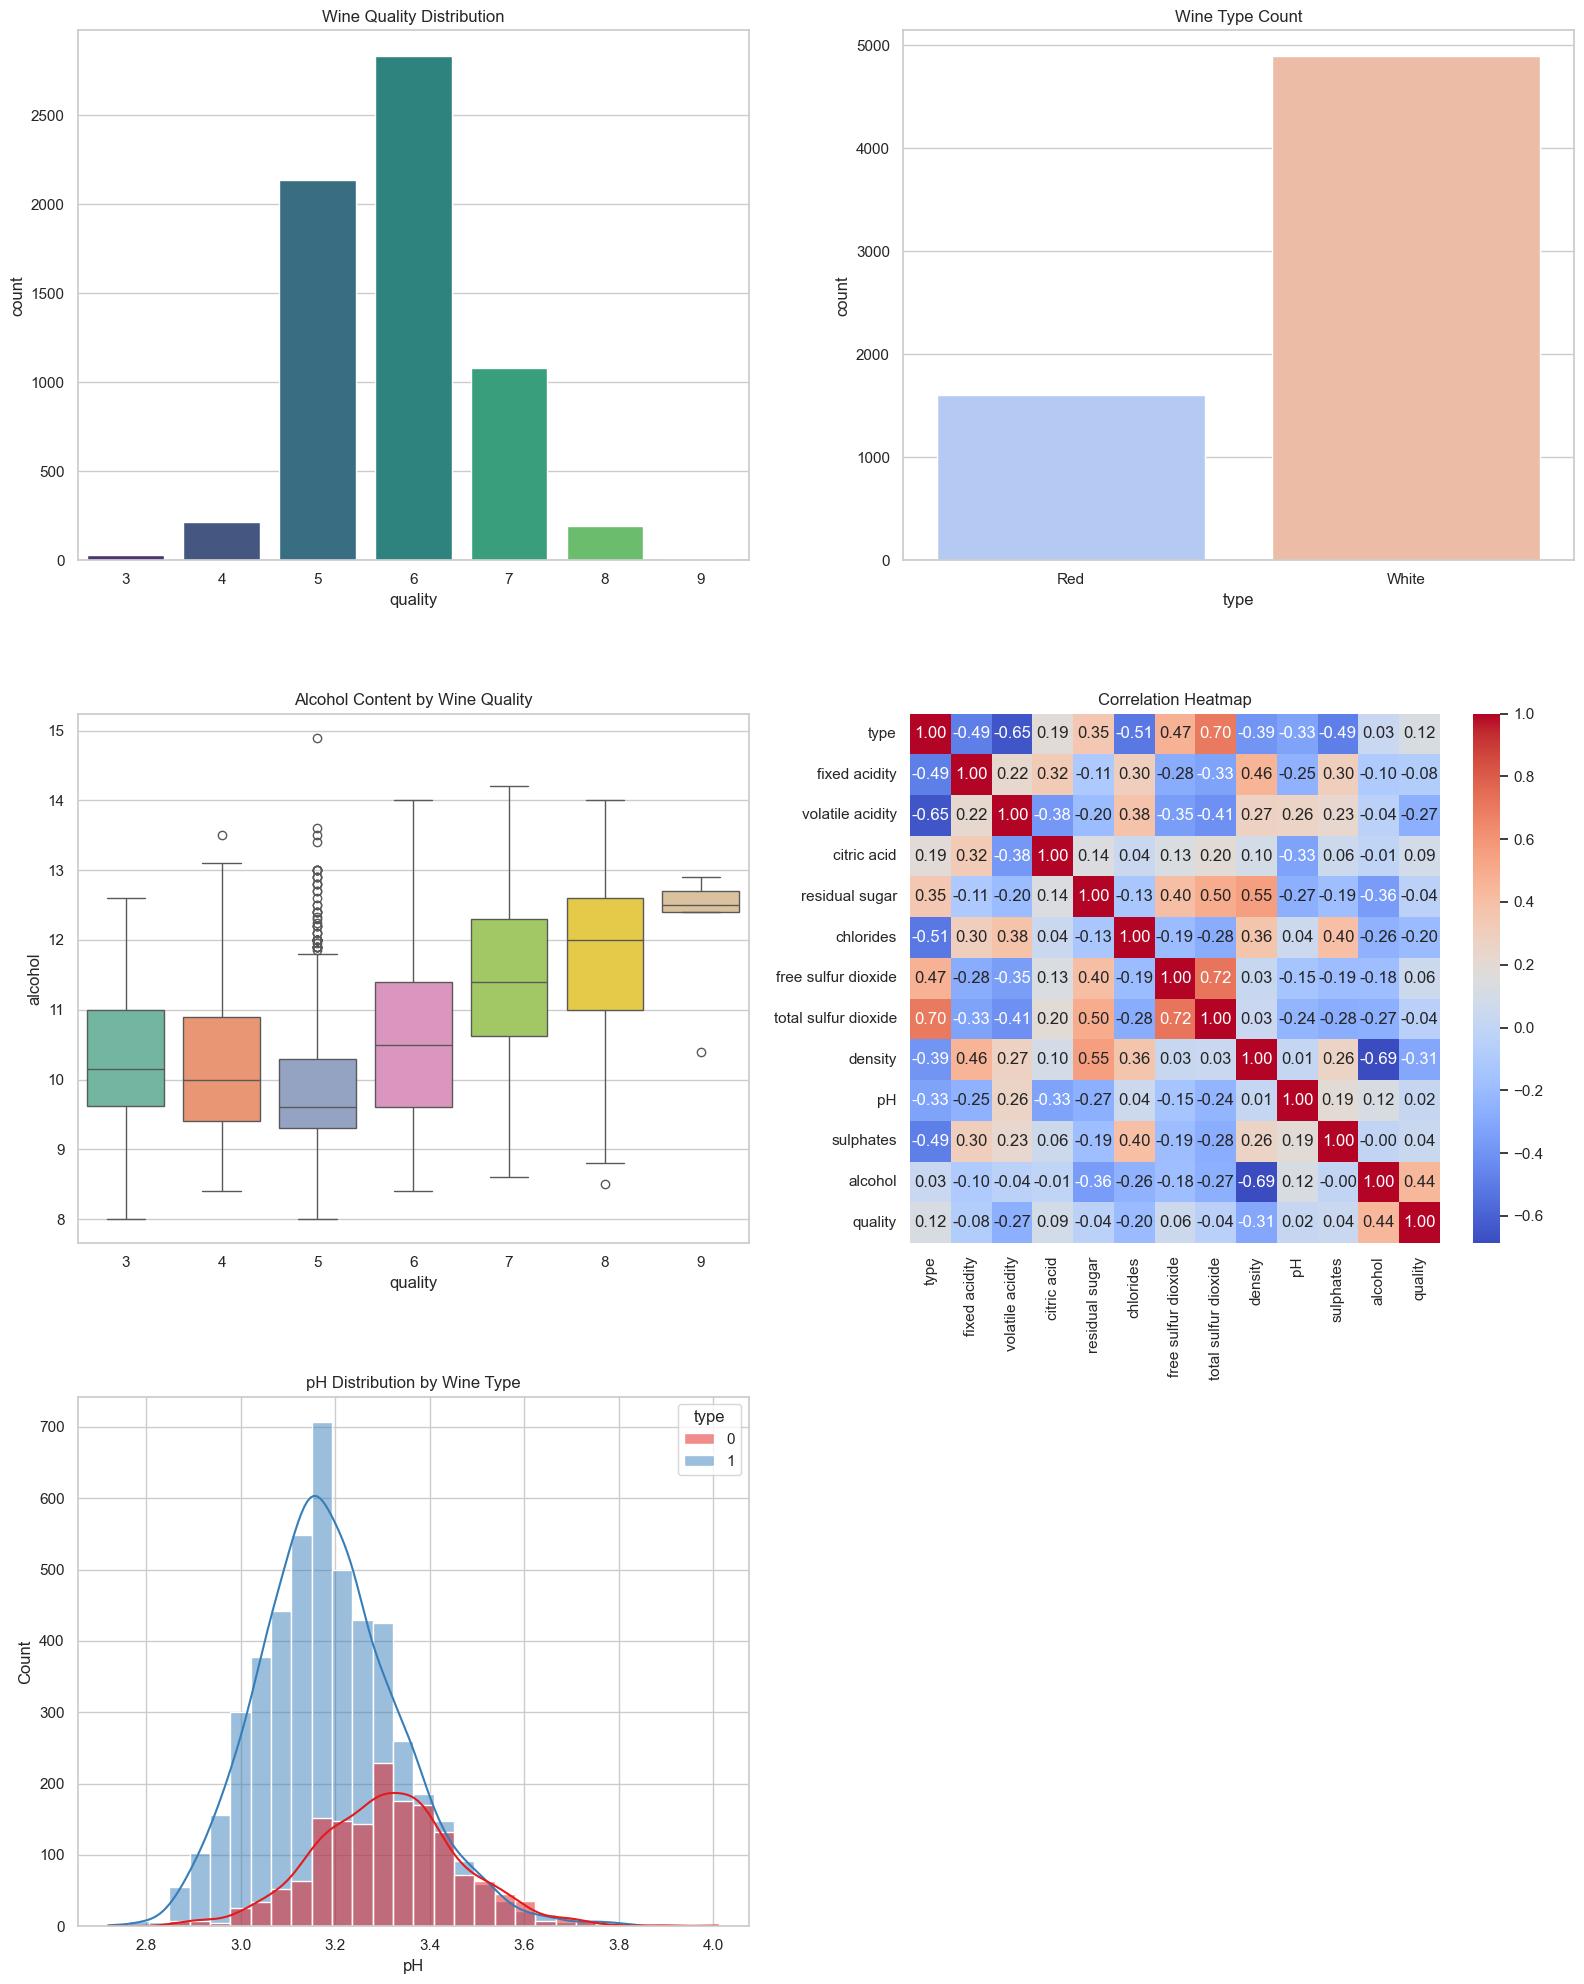

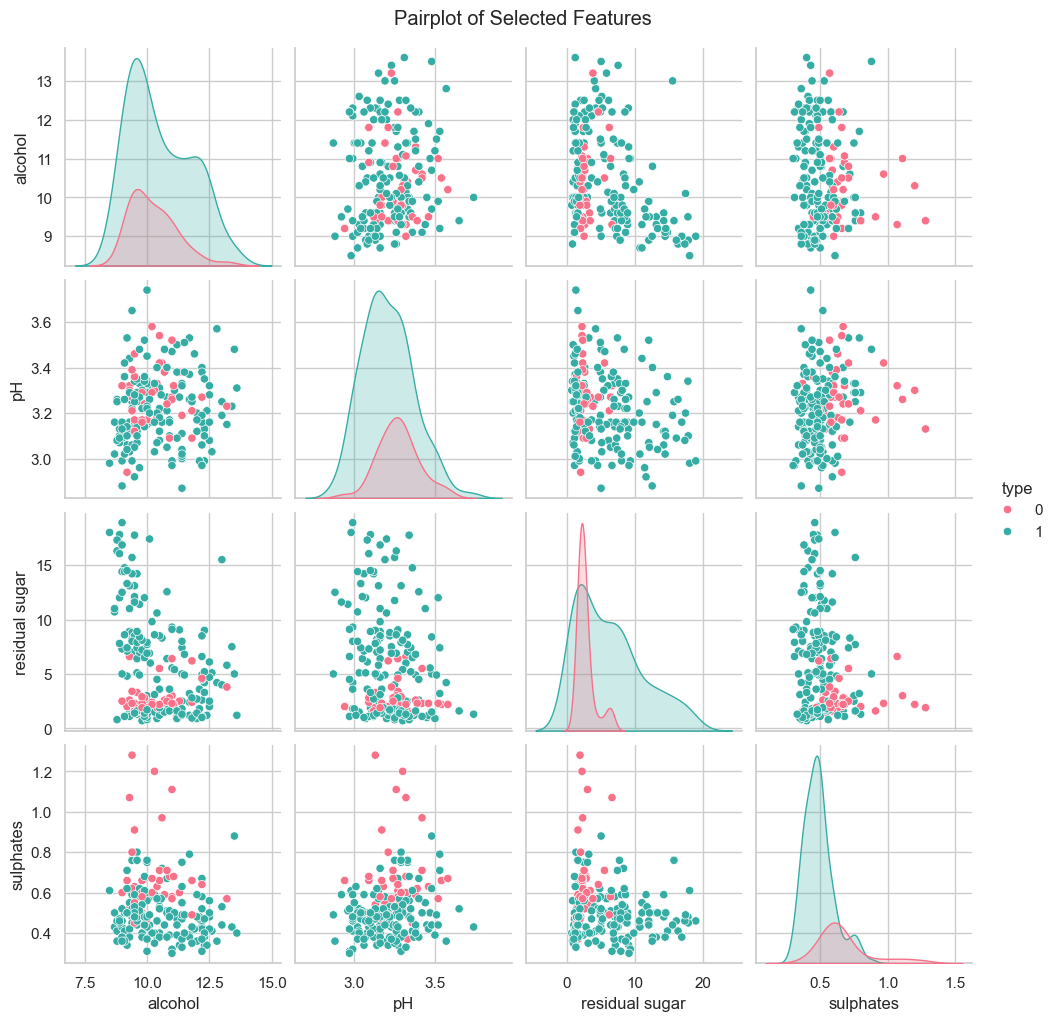

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("winequalityN.csv")

# Data Cleaning: Fill missing values
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical data
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])  # white = 1, red = 0

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots for various charts
plt.figure(figsize=(16, 20))

# 1. Distribution of Quality
plt.subplot(3, 2, 1)
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Wine Quality Distribution')

# 2. Wine Type Count
plt.subplot(3, 2, 2)
sns.countplot(x='type', data=df, palette='coolwarm')
plt.title('Wine Type Count')
plt.xticks([0, 1], ['Red', 'White'])

# 3. Alcohol vs Quality
plt.subplot(3, 2, 3)
sns.boxplot(x='quality', y='alcohol', data=df, palette='Set2')
plt.title('Alcohol Content by Wine Quality')

# 4. Correlation Heatmap
plt.subplot(3, 2, 4)
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')

# 5. pH Distribution by Type
plt.subplot(3, 2, 5)
sns.histplot(data=df, x='pH', hue='type', kde=True, palette='Set1', bins=30)
plt.title('pH Distribution by Wine Type')

plt.tight_layout()
plt.show()

# 6. Pairplot of Selected Features (Run separately)
pairplot_sample = df[['alcohol', 'pH', 'residual sugar', 'sulphates', 'type']].dropna()
sns.pairplot(pairplot_sample.sample(200), vars=['alcohol', 'pH', 'residual sugar', 'sulphates'], hue='type', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

Create a Classification and Regression model


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import joblib

# Load and preprocess
df = pd.read_csv("winequalityN.csv")
df.fillna(df.median(numeric_only=True), inplace=True)
df['type'] = LabelEncoder().fit_transform(df['type'])

# Convert quality to categorical: low (3–5), medium (6), high (7–9)
df['quality_label'] = pd.cut(df['quality'], bins=[2, 5, 6, 10], labels=['low', 'medium', 'high'])

# Features and target
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
print(classification_report(y_test, model.predict(X_test)))

# Export model
joblib.dump(model, 'wine_quality_model.pkl')


              precision    recall  f1-score   support

        high       0.75      0.57      0.65       253
         low       0.77      0.80      0.78       468
      medium       0.70      0.75      0.72       579

    accuracy                           0.73      1300
   macro avg       0.74      0.71      0.72      1300
weighted avg       0.73      0.73      0.73      1300



['wine_quality_model.pkl']